In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Data Understanding and Preprocessing

In [13]:
# df = pd.read_csv('Dataset/diabetic_data_test.csv')
df = pd.read_csv('Dataset/diabetic_data_training.csv')

df.shape

(91589, 50)

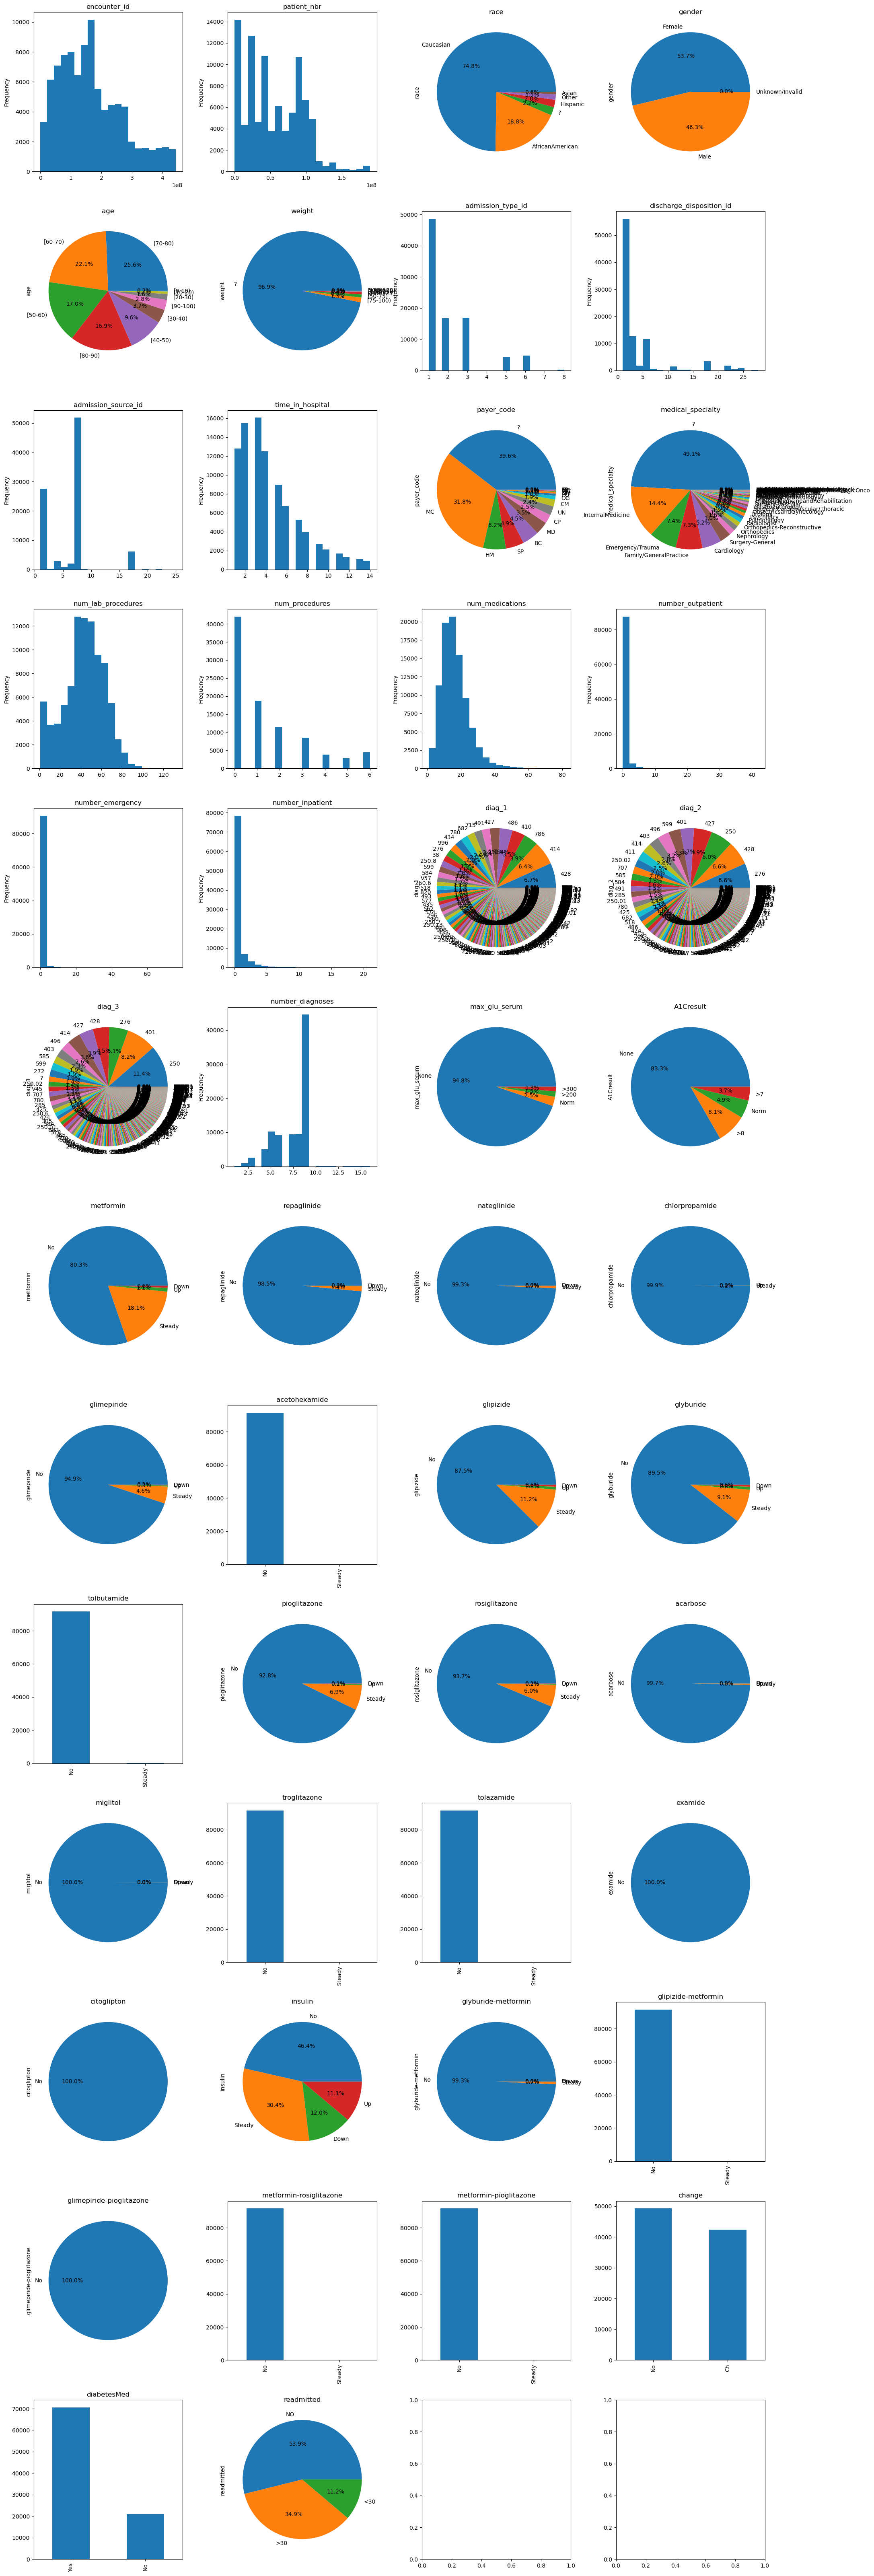

In [14]:
# Function to handle different data types for plotting
def plot_column(ax, column):
    if df[column].dtype == 'object':
        # Check if binary
        if df[column].nunique() == 2:
            # Binary data visualization
            df[column].value_counts().plot(kind='bar', ax=ax)
        else:
            # Categorical data visualization
            df[column].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax)
    elif df[column].dtype == 'int64' or df[column].dtype == 'float64':
        # Numeric data visualization
        df[column].plot(kind='hist', bins=20, ax=ax)
    else:
        ax.text(0.5, 0.5, f"Unhandled data type for column: {column}", 
                fontsize=12, ha='center')
    ax.set_title(column)

# Creating a 4x4 subplot layout
fig, axes = plt.subplots(nrows=13, ncols=4, figsize=(20, 65))
fig.tight_layout(pad=5.0)

# Iterate through each column and plot
for i, col in enumerate(df.columns):
    # Adjust this line to select different subsets of columns  
    plot_column(axes[i//4, i%4], col)


plt.show()


One-Hot Encoding For race:
cons: One-hot encoding can lead to a significant increase in the dataset's dimensionality (a problem known as the "curse of dimensionality"), especially if the categorical feature has many unique values. This can increase the computational cost and may require more data to achieve good performance.
Dems Redct Would be apply, so it doesn't matter
pros: Map to a fix number implies an ordinal relationship between the categories which may not exist, but is ideal for non-ordinal categorical data. It's suitable for many machine learning models, especially those that assume no ordinal relationship between categories


1. random forest, remove ?
2. randomly assign ? to a class by disstribution

age encoding: 
1. mean
2. 

In [23]:
def one_hot_encode(feature):
    """
    Takes a series and one-hot encodes it.
    
    Parameters:
    df (pandas.series): series containing a colum of the feature matrix.

    Returns:
    np.ndarray: A ndarray one-hot encoded.
    """
    encoded_df = pd.get_dummies(feature).values
    return encoded_df

Since there are lot of feature need processing, create a new matrix and put processed data in it.

Encoding for age:
1. Asumming normal distribution, map to a random age in the range
2. Map to mean age in the range
3. 
4. 

Missing value
1. multiple imputation To be decide when training if less than 1h 5 epoch
2. mean
3. fullly remove

1. missing
2. string -> number
3. range -> number
4. wrong -> fix


Dems Redct
1. PCA/PPCA
2. LDA/QDA
3. 

encode payer_code, medical_specialty
1. Find correlation internally with other feature in group of non-missing value
2. Use identified feature predict payer-code, medical_specialty
3. Prediction algorithm to be decide, could be KNN

encode diag_1,diag_2,diag_3
1. one hot
2. ????????????? TBD
3. remove missing

encoding all medicine:
map to 0-3